# Data Mining Project

## Yonatan Golan, Ziv Haba

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings # Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [2]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

## 1. Data information:

In [3]:
df = pd.read_csv("./hotels_train.csv")
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [5]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


From the information above we can learn about missing values, attributes data type and unmatched data type.
- Missing values: for the attributes 'board_type', 'lead_time', 'purchase_type', and 'price'.
- Unmatched data type: for the attribute 'room_type' the data type is object and it should be a numeric ,we need to convert it.
- unique, top and freq relevent to data from object type

In [6]:
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)  #d - numeric values
df['room_type'].dtype

dtype('int32')

#### Split to attributes and taget

In [12]:
target =pd.DataFrame(df['is_canceled']) 
data = df.drop(['ID', 'is_canceled'], axis=1)
data

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,1,5,1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018
1,0,3,1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018
2,0,2,4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018
3,1,2,1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018
4,1,3,4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,1,NaN,3,0,0,0,1,106.0,NaN,0,0,0,NaN,7/18/2018
27209,0,4,1,half board,2,0,0,0,1,18.0,Online,0,0,0,113.0,2/24/2018
27210,0,2,1,NaN,2,0,0,0,0,147.0,Offline,0,0,0,105.0,4/15/2018
27211,1,0,4,half board,1,0,0,0,0,3.0,Aviation,0,0,0,130.0,5/22/2018


#### Split to nominal and numerical attributes

In [13]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
       'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price'],
      dtype='object')

In [14]:
numeric_data = data[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)

## 2. Data statistics:

### Numerical data:
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

#### Statistic information:
Describe function show statistic information for numerical data.

In [27]:
numeric_data.describe() 

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000


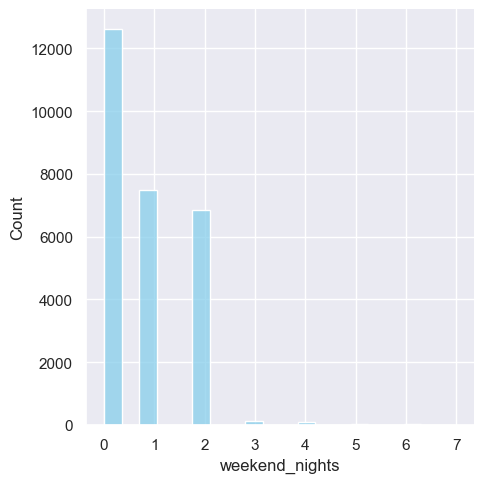

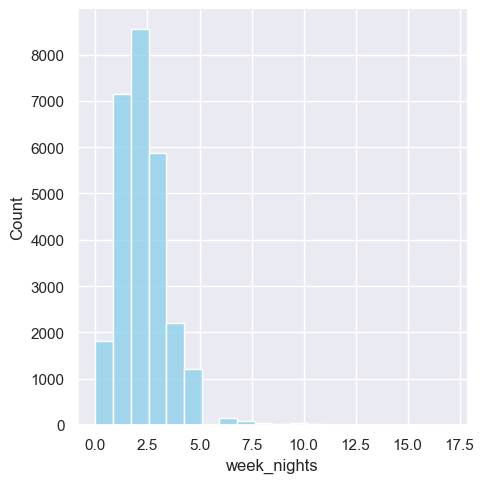

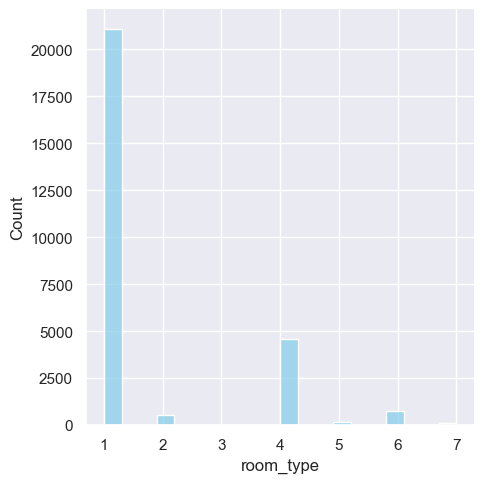

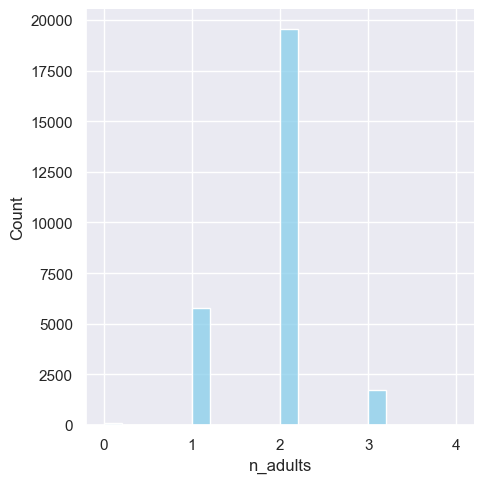

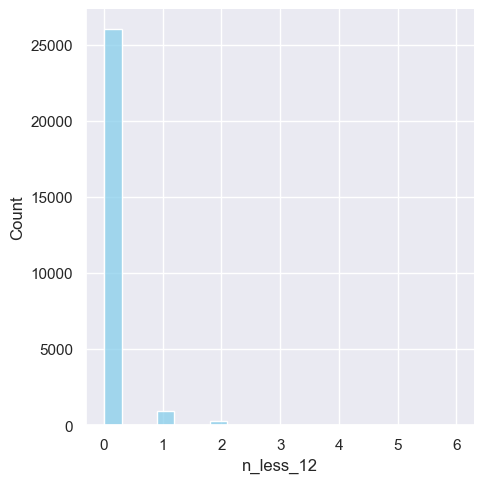

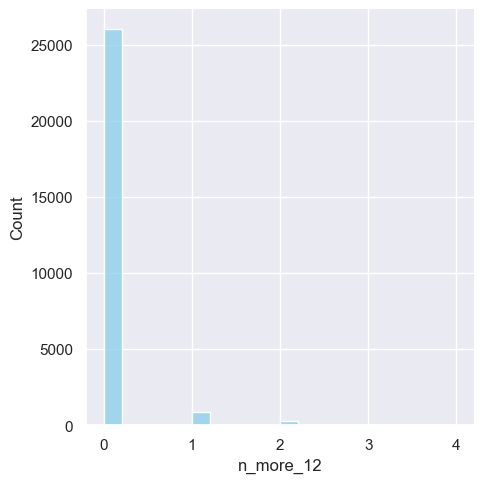

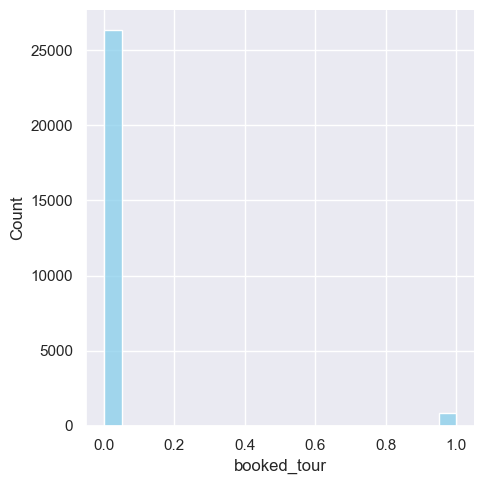

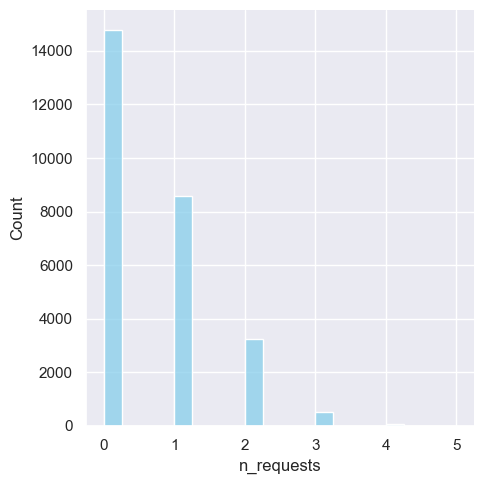

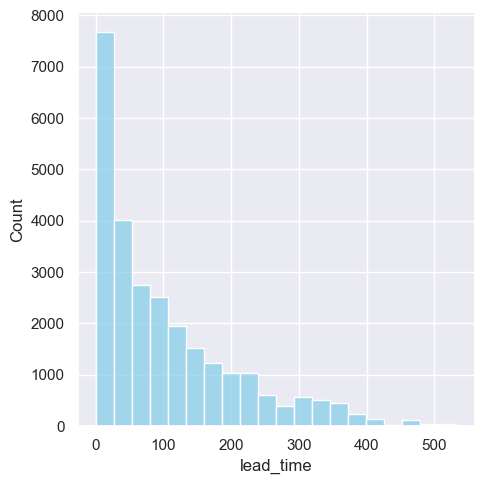

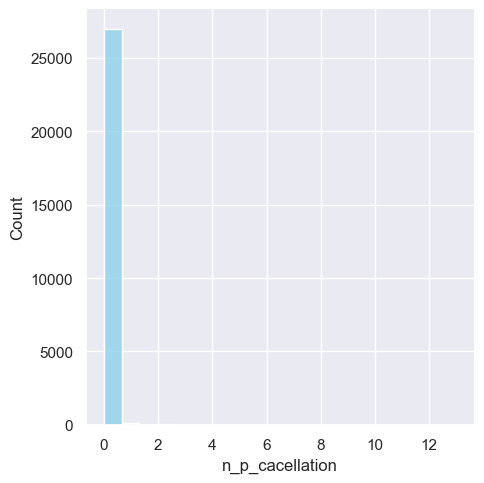

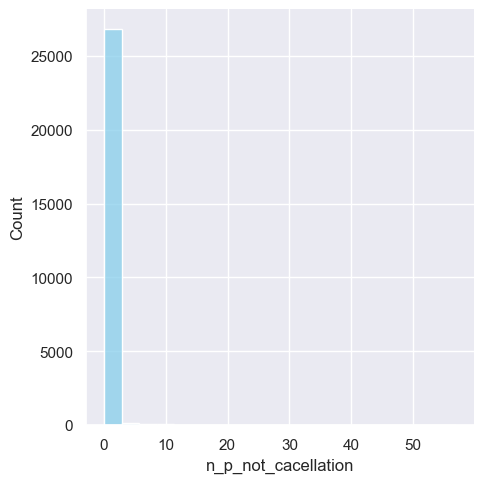

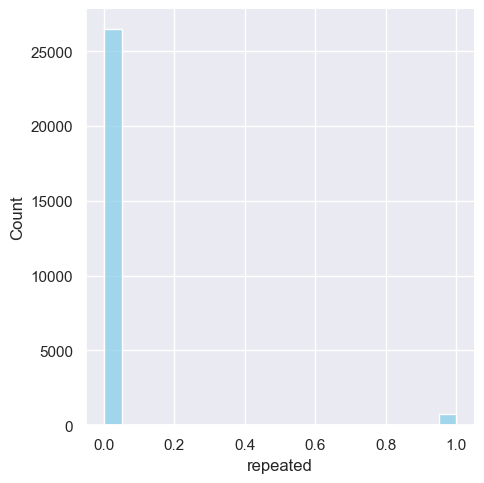

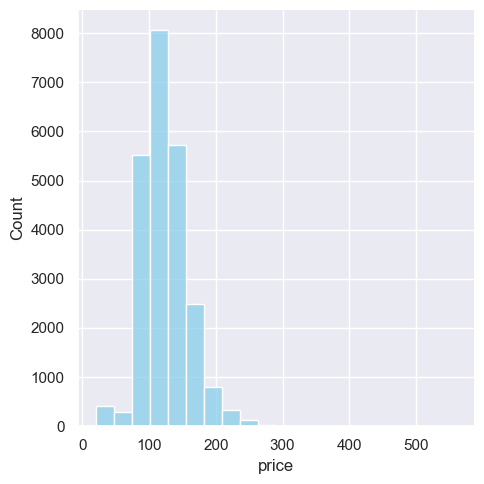

In [25]:
for col in numeric_col:
    sns.displot(numeric_data[col], bins=20,color='skyblue')

*לגבי ההערה הזו וההערה הבאה שהוספתי צריך שתוודא אותי


From the histograms above it looks like 'week_nights', 'n_adults' and 'price' are normal distributed whereas the other attributes are not. Moreover, we can see that 'room_type' has only few values with importance to the order (assumption) i.e. it's a categorical ordinal attribute.

#### Skweness

In [26]:
for col in ['weekend_nights', 'week_nights', 'n_less_12', 'n_more_12', 'lead_time', 'price']:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True) )

weekend_nights  skewness: 0.7187888765659908
week_nights  skewness: 1.5422954469230514
n_less_12  skewness: 5.749665488234375
n_more_12  skewness: 5.569096359968911
lead_time  skewness: 1.291447308852505
price  skewness: 0.682392611272259


*As we can see at the graphs and from the skewness calculation,'n_less_12' and 'n_more_12' column have long right tail that indicate on asymmrtric distribution while 'price' and 'weekend_nights' are more symmetric.

#### probability

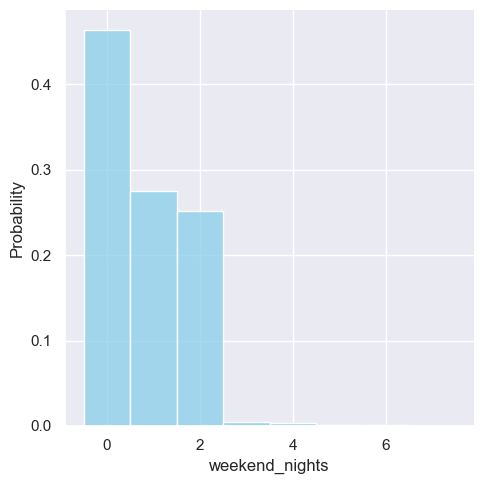

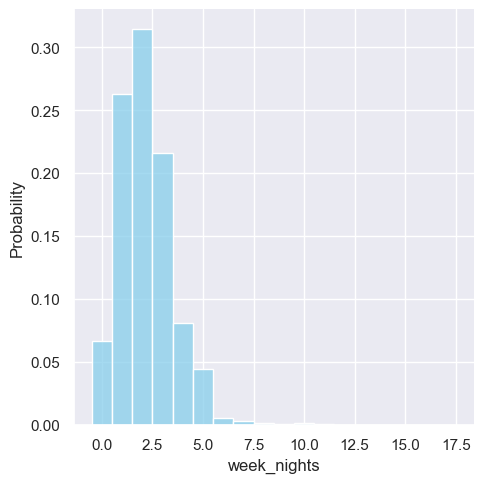

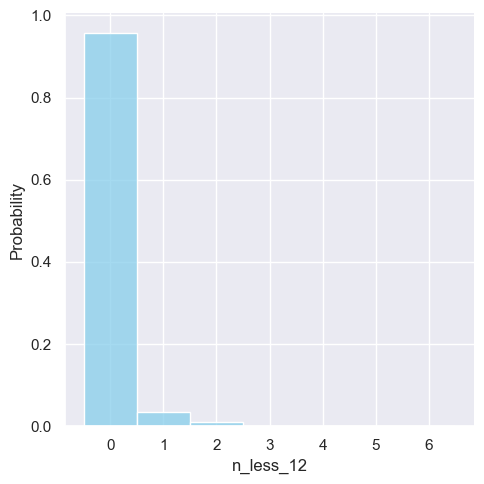

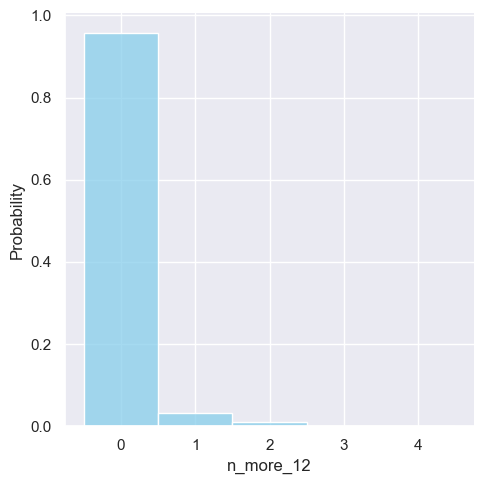

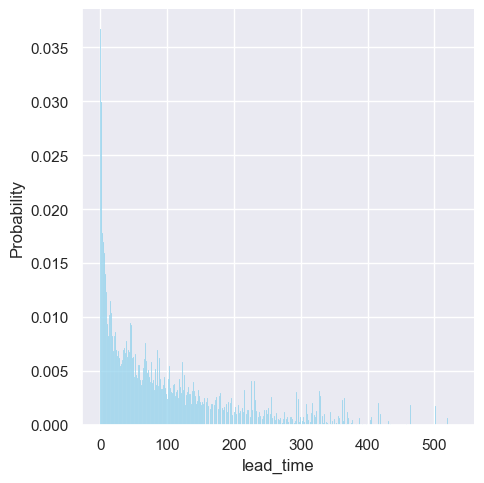

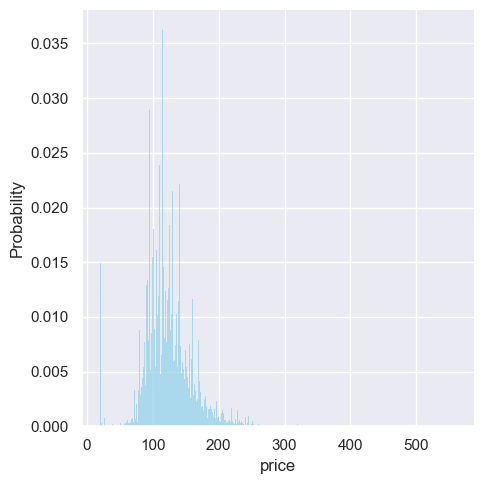

In [28]:
for col in ['weekend_nights', 'week_nights', 'n_less_12', 'n_more_12', 'lead_time', 'price']:
     sns.displot(numeric_data[col], color='skyblue' ,stat="probability", discrete=True )

#### Categorial attributes

In [31]:
 print(numeric_data['room_type'].value_counts().sort_index())

room_type
1    21084
2      511
3        3
4     4571
5      180
6      741
7      123
Name: count, dtype: int64


<Axes: ylabel='price'>

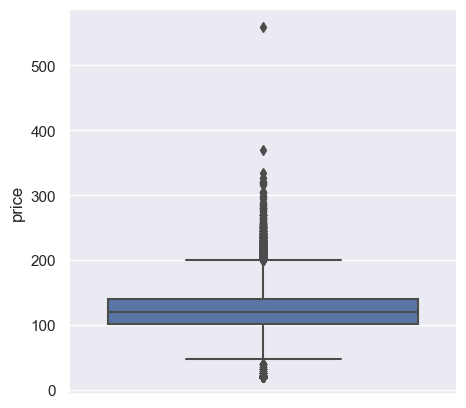

In [32]:
sns.boxplot(y="price", data=df)

### Nominal data:
For nominal data we would like to know how many unique values there are and the distribution.

In [33]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   board_type     19045 non-null  object
 1   purchase_type  22366 non-null  object
 2   date           27213 non-null  object
dtypes: object(3)
memory usage: 637.9+ KB


Describe function for nomiunal data show information about unique value, top value and the top value frequency.

In [34]:
describe_df = nominal_data.describe()
describe_df

,board_type,purchase_type,date
count,19045,22366,27213
unique,4,5,553
top,half board,Online,10/13/2018
freq,14591,14306,188


Adding the top value frequency in percent.

In [38]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/x.loc['count'], decimals=3))
describe_df

,board_type,purchase_type,date
count,19045,22366,27213
unique,4,5,553
top,half board,Online,10/13/2018
freq,14591,14306,188
%freq,0.766,0.64,0.007


#### Histograms
The column 'date' has to many unique values so there is no reason to look on his histogram.

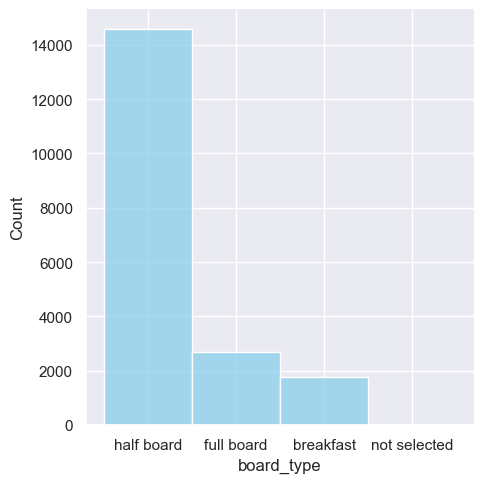

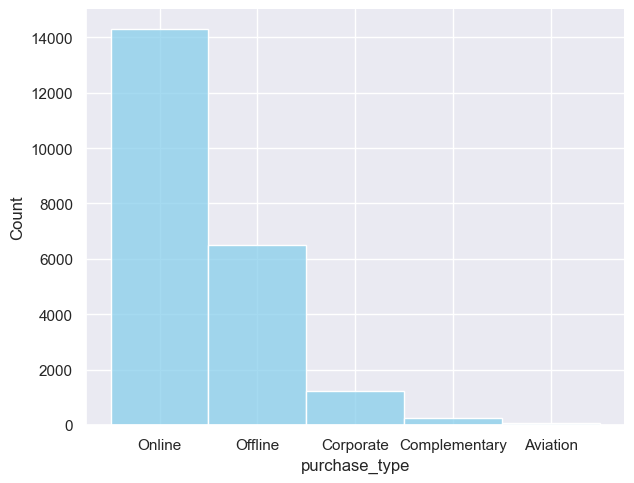

In [55]:
sns.displot(nominal_data, x='board_type', color='skyblue')
sns.displot(nominal_data, x='purchase_type',aspect=1.3, color='skyblue')

### Target

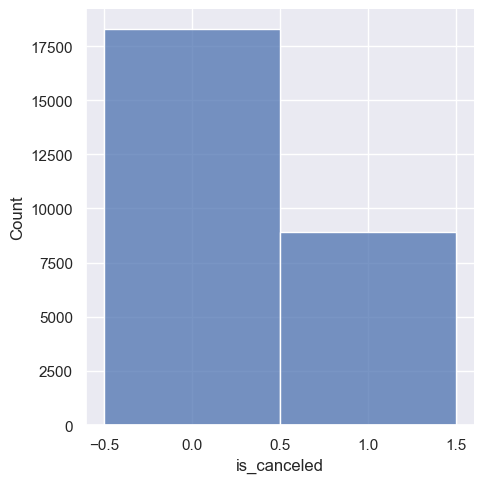

In [58]:
sns.displot(target, x='is_canceled', discrete=True)

#### Pie chart

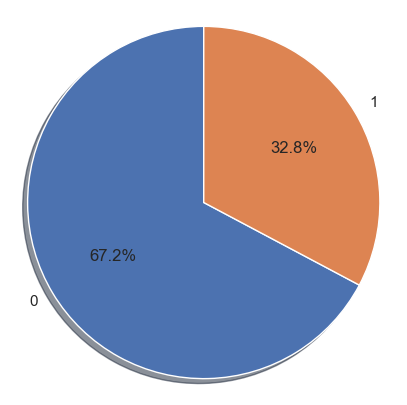

In [59]:
fig1, ax1 = plt.subplots()
ax1.pie(target['is_canceled'].value_counts(), labels=target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

## 3. Attributes correlations

In [60]:
df[df.describe().columns].corr(method = 'pearson')  # check for correlation, more then +-0.3 there is a little bit connection

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled
weekend_nights,1.000000,0.172582,0.060986,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571
week_nights,0.172582,1.000000,0.093326,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008
room_type,0.060986,0.093326,1.000000,0.270896,0.276393,0.278152,0.039589,0.145410,-0.106801,-0.006050,-0.009804,-0.023882,0.469287,0.026948
n_adults,0.106355,0.105197,0.270896,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098
n_less_12,0.019048,0.009291,0.276393,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208
n_more_12,0.020736,0.020412,0.278152,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083
booked_tour,-0.033336,-0.052188,0.039589,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230
n_requests,0.060688,0.046046,0.145410,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765
lead_time,0.045434,0.149524,-0.106801,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932
n_p_cacellation,-0.023784,-0.027565,-0.006050,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572


Visualization of the correlation matrix

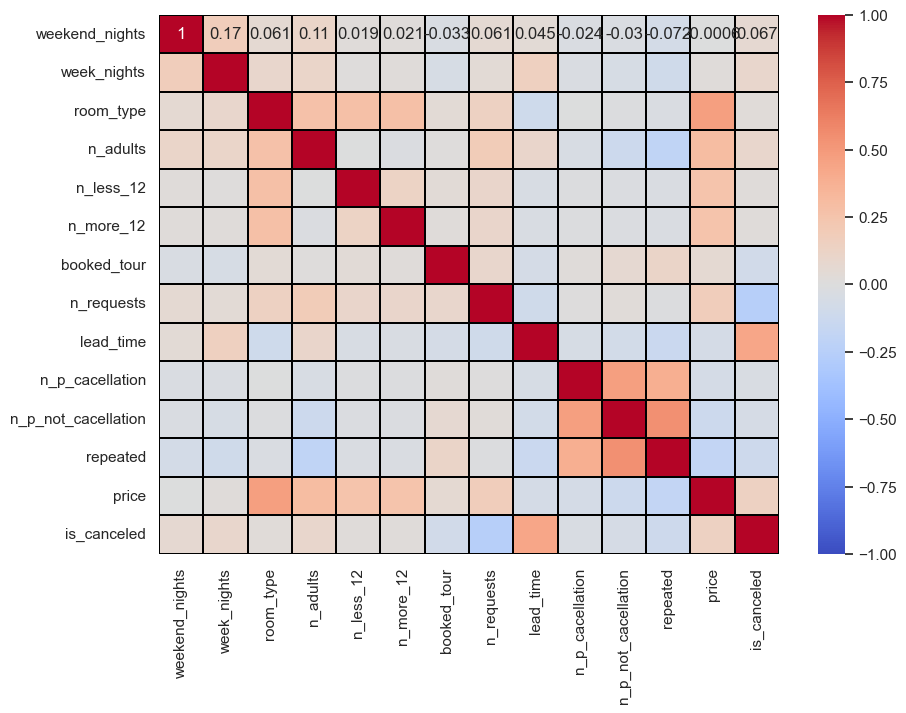

In [61]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

לגבי ההערה הזו אני צריך שתוודא אותי*

We can see that the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

Moreover we can see strong correlation between 'room_type' and 'price' which is obvious because some of the room types cost more than others. 
Other strong correlations we can see between 'n_p_cacellation' and 'n_p_not_cacellation, and between 'n_p_not_cacellation and 'repeated'(and also smaller correlation between 'repeated' and 'n_p_cacellation').
Those three attributes describe:
    • 'repeated': indicates whether the reservation is a repeat reservation
    • 'n_p_cacellation': number of previous reservations that were canceled by the customer prior to the current reservation
    • 'n_p_not_cacellation': number of previous reservations not canceled by the customer prior to the current reservation 
It's making sense those three have correlation because just if reservation is a repeat reservation there is a chance that the customer had prior reservation which might got canceled(and then increase the 'n_p_cacellation' or not and then increase the attribute 'n_p_not_cacellation'.
We can see other smaller correlation between 'n_adults' and 'price' which also obvious because when you have more adults the price getting higher. 

## 4. Interesting insights from the data

As been said in the privous note - the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

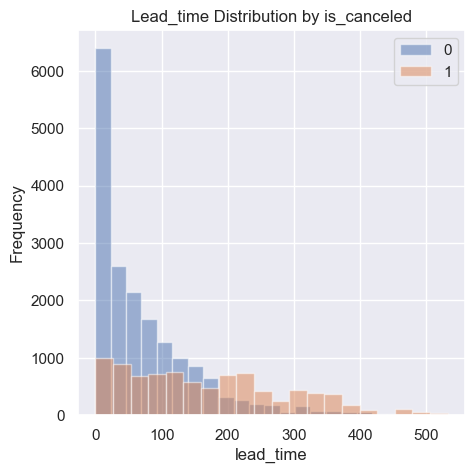

In [62]:
df.groupby('is_canceled')['lead_time'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('lead_time')
plt.ylabel('Frequency')
plt.title('Lead_time Distribution by is_canceled')
plt.show()

'lead_time' represents the number of days between the reservation date and the arrival date
We can see from the above plot and the correlation that when the lead time is greater - there are more chances the reservation will get canceled.